In [62]:
import networkx as nx

Examples of undirected graphs

In [63]:
def initialize_graph_1():
    G = nx.Graph()
    nodes = ('u', 'v', 'w', 'x', 'y', 'z')
    G.add_nodes_from(nodes)
    edges = (('u','v'), ('u','w'), ('v','w'), ('v','x'), ('w','x'),
             ('w','y'), ('y','x'), ('x','z'))
    G.add_edges_from(edges)
    return G

In [64]:
def initialize_graph_2():
    G = nx.Graph()
    nodes = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L')
    G.add_nodes_from(nodes)
    edges = (('A','B'), ('A','C'), ('A','D'), ('A','E'), ('A','F'),
             ('A','H'), ('B','C'), ('C','D'), ('D','L'), ('F','G'),
             ('G','H'), ('H','I'), ('H','L'))
    G.add_edges_from(edges)
    return G

Closeness centrality algorithm for unweighted graphs

In [65]:
def closeness_centrality(G, v):
    length = dict(nx.all_pairs_shortest_path_length(G))
    sum = 0
    
    for node in G.nodes():
        sum = sum + length[v][node]
        
    return (G.number_of_nodes() - 1) / sum
    

In [66]:
G = initialize_graph_1()

for n in G.nodes():
    print(closeness_centrality(G, n))

0.5555555555555556
0.7142857142857143
0.8333333333333334
0.8333333333333334
0.625
0.5


In [67]:
G = initialize_graph_2()

for n in G.nodes():
    print(closeness_centrality(G, n))

0.75
0.47368421052631576
0.5294117647058824
0.5294117647058824
0.45
0.5
0.45
0.6428571428571429
0.4090909090909091
0.47368421052631576


Example of directed graph

In [68]:
def initialize_weighted_graph():
    G = nx.Graph()
    nodes = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L')
    G.add_nodes_from(nodes)
    G.add_edge('A','B',weight=2)
    G.add_edge('A','C',weight=5)
    G.add_edge('A','D',weight=9)
    G.add_edge('A','E',weight=7)
    G.add_edge('A','F',weight=2)
    G.add_edge('B','C',weight=2)
    G.add_edge('C','D',weight=3)
    G.add_edge('D','L',weight=8)
    G.add_edge('F','G',weight=1)
    G.add_edge('G','H',weight=1)
    G.add_edge('H','I',weight=3)
    G.add_edge('H','L',weight=4)
    
    return G

Closeness centrality algorithm for weighted graphs

In [69]:
def closeness_centrality_weighted(G, v):
    length = dict(nx.all_pairs_dijkstra_path_length(G))
    sum = 0
    
    for node in G.nodes():
        sum = sum + length[v][node]
        
    return (G.number_of_nodes() - 1) / sum
    

In [70]:
G = initialize_weighted_graph()

for node in G.nodes():
    print("{}: {}".format(node, closeness_centrality_weighted(G,node)))

A: 0.20454545454545456
B: 0.17307692307692307
C: 0.14285714285714285
D: 0.1111111111111111
E: 0.09
F: 0.20454545454545456
G: 0.1956521739130435
H: 0.18
I: 0.12162162162162163
L: 0.12162162162162163


In [71]:
import numpy as np
from numpy import size
import random
import sklearn

Eppstein-Wang algorithm for weighted and unweighted graphs

In [72]:
def eppstein_wang(G,k,weight=False,verbose=False):
    # Number of nodes in the graph
    n = G.number_of_nodes()
    # Initialize the array of sum
    sum = np.zeros(n)
    # Save a list of nodes
    nodes = list(G.nodes())
    # Get k random index that refers to k nodes
    index = random.sample(range(n), k)
    
    # Create the matrix of distance between nodes
    length = dict()
    if weight == False:
        length = dict(nx.all_pairs_shortest_path_length(G))
    else:
        length = dict(nx.all_pairs_dijkstra_path_length(G))
    
    # For each node compute the distance respect the k nodes
    for i in index:
        tmp_node = nodes[i]
        for j in range(n):
            sum[j] = sum[j] + length[tmp_node][nodes[j]]
    
    # Initialize the approximated cost
    c = np.zeros(n)
    
    # Save the results in the array
    for i in range(len(sum)):
        c[i] = 1 / ((n * sum[i]) / (k * (n-1)))
        
    if verbose:
        for i in range(len(sum)):
            print("{}: {}".format(nodes[i], c[i]))
    
    return c;
    
    

In [73]:
G = initialize_graph_1()

result = eppstein_wang(G,6,verbose=True)

u: 0.5555555555555556
v: 0.7142857142857143
w: 0.8333333333333334
x: 0.8333333333333334
y: 0.625
z: 0.5


In [74]:
G = initialize_weighted_graph()

result = eppstein_wang(G,5,weight=True,verbose=True)

A: 0.20454545454545453
B: 0.1875
C: 0.15
D: 0.1
E: 0.10465116279069768
F: 0.1875
G: 0.16666666666666666
H: 0.15
I: 0.11538461538461539
L: 0.09183673469387754


Approximating Betweenness Centralities

In [75]:
def app_betweenness_centralities(G,k,weight=False):
    # Initialize array of cost
    b = np.zeros(G.number_of_nodes())
    # Save a list of nodes
    nodes = list(G.nodes())
    
    # For each node compute the distance respect the k nodes
    for i in range(k):
        # Get random pair
        pair = random.sample(nodes,2)
        # Compute shortest path between pair and get  a random between the resulting elements
        shortest_path = random.choice(list(nx.all_shortest_paths(G,pair[0],pair[1],weight=weight)))
        
        # If the node is not in the path update the cost
        for i in range(len(nodes)):
            if nodes[i] != pair[0] and nodes[i] != pair[1]:
                b[i] = b[i] + 1/k
    return b
        

In [76]:
G = initialize_weighted_graph()

app_betweenness_centralities(G,4,True)

array([0.75, 0.75, 0.5 , 1.  , 0.75, 0.75, 1.  , 0.75, 0.75, 1.  ])

Local clustering coefficient

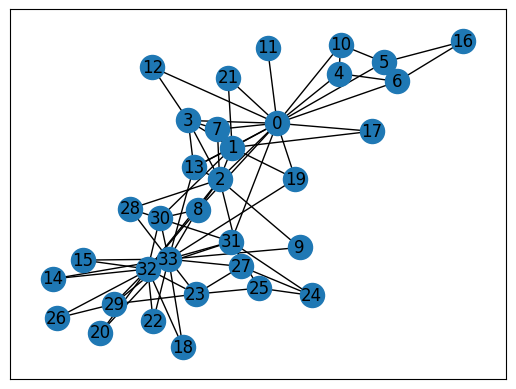

In [77]:
G = nx.karate_club_graph()

nx.draw_networkx(G)

In [78]:
deg = nx.degree_centrality(G)

print(deg)

{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


In [79]:
clos = nx.closeness_centrality(G)

print(clos)

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


In [80]:
bet = nx.betweenness_centrality(G)

print(bet)

{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
